In [1]:
import xarray as xr
import numpy as np
import os
import optuna
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import cm as cmap
import seaborn as sb
from cycler import cycler

# Experiment 1

In [2]:
colors = {
    0.5: 'tab:blue',
    1.5: 'tab:red',
    2.5: 'tab:pink'
}

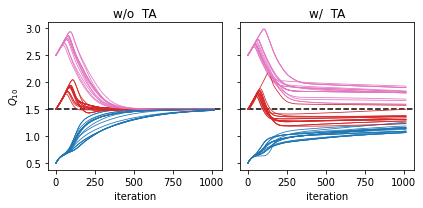

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

axes[0].axhline(1.5, ls='--', color='k')
axes[1].axhline(1.5, ls='--', color='k')

for i, p in enumerate(glob('../logs/experiment_01/n_ta/lightning_logs/version_*/predictions.nc')):
    ds = xr.open_dataset(p)
    ds.q10.plot(color=colors[ds.q10.attrs['q10_init']], ax=axes[0], lw=0.8)

for i, p in enumerate(glob('../logs/experiment_01/w_ta/lightning_logs/version_*/predictions.nc')):
    ds = xr.open_dataset(p)
    ds.q10.plot(color=colors[ds.q10.attrs['q10_init']], ax=axes[1], lw=0.8)

axes[0].set_title('w/o  TA')
axes[0].set_ylabel(r'$Q_{10}$')
axes[0].set_xlabel('iteration')
axes[1].set_title('w/  TA')
axes[1].set_ylabel('')
axes[1].set_xlabel('iteration')

fig.tight_layout()
fig.savefig('./plots/training_progress.png', dpi=200, transparent=False, facecolor='w')

In [5]:
study = optuna.study.load_study(study_name='q10hybrid', storage='sqlite:////Net/Groups/BGI/people/bkraft/git/q10hybrid/logs/experiment_01/optuna.db')

In [12]:
df = study.trials_dataframe()[['value', 'params_features', 'params_q10_init']]

In [14]:
df

value      params_features  params_q10_init
0    0.000439      sw_pot, dsw_pot              1.5
1    0.000967  sw_pot, dsw_pot, ta              1.5
2    0.000383      sw_pot, dsw_pot              2.5
3    0.003119  sw_pot, dsw_pot, ta              2.5
4    0.000707  sw_pot, dsw_pot, ta              1.5
..        ...                  ...              ...
107  0.000420      sw_pot, dsw_pot              2.5
108  0.000420      sw_pot, dsw_pot              2.5
109  0.000420      sw_pot, dsw_pot              2.5
110  0.000483      sw_pot, dsw_pot              0.5
111  0.000483      sw_pot, dsw_pot              0.5

[112 rows x 3 columns]

<AxesSubplot:xlabel='params_q10_init', ylabel='value'>

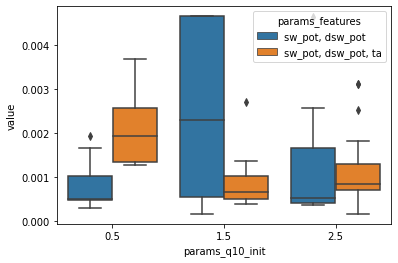

In [20]:
sb.boxplot(x='params_q10_init', y='value', hue='params_features', data=df)

In [13]:
ds = xr.open_mfdataset('../logs/experiment_01/n_ta/lightning_logs/version_*/predictions.nc', combine='nested', concat_dim='rep')

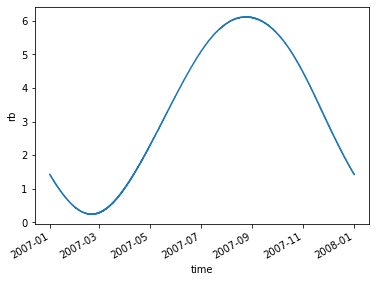

In [18]:
ds.rb.plot()

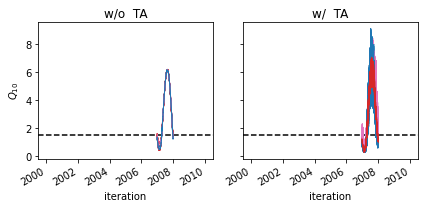

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

axes[0].axhline(1.5, ls='--', color='k')
axes[1].axhline(1.5, ls='--', color='k')

for i, p in enumerate(glob('../logs/experiment_01/n_ta/lightning_logs/version_*/predictions.nc')):
    ds = xr.open_dataset(p)
    ds.rb_pred.isel(epoch=34).plot(color=colors[ds.q10.attrs['q10_init']], ax=axes[0], lw=0.8)

for i, p in enumerate(glob('../logs/experiment_01/w_ta/lightning_logs/version_*/predictions.nc')):
    ds = xr.open_dataset(p)
    ds.rb_pred.isel(epoch=34).plot(color=colors[ds.q10.attrs['q10_init']], ax=axes[1], lw=0.8)

axes[0].set_title('w/o  TA')
axes[0].set_ylabel(r'$Q_{10}$')
axes[0].set_xlabel('iteration')
axes[1].set_title('w/  TA')
axes[1].set_ylabel('')
axes[1].set_xlabel('iteration')

fig.tight_layout()
# fig.savefig('./plots/training_progress.png', dpi=200, transparent=False, facecolor='w')

# Experiment 2

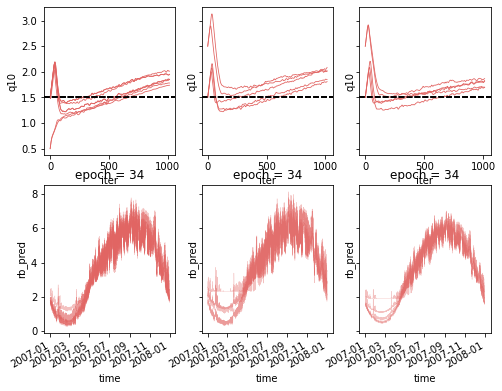

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(8, 6), sharey='row')

for i, p in enumerate(glob(f'../logs/experiment_02/lightning_logs/version_*/predictions.nc')):
    ds = xr.open_dataset(p)
    weight_decay = ds.q10.attrs['weight_decay']
    q10_init = ds.q10.attrs['q10_init']

    if weight_decay == 0.:
        ax = axes[:, 0]
    elif weight_decay == 0.01:
        ax = axes[:, 1]
    elif weight_decay == 0.1:
        ax = axes[:, 2]
    else:
        continue
    if q10_init == 0.5:
        ls = '--'
    elif q10_init == 1.5:
        ls = ':'
    elif q10_init == 2.5:
        ls = '-'
    #color = cmap.plasma(dropout)
    ds.q10.plot(color=color, ax=ax[0], lw=0.8)
    ax[0].axhline(1.5, ls='--', color='k')
    ds.rb_pred.isel(epoch=34).plot(ax=ax[1], color=color, alpha=0.4, lw=0.4)

# axes[0].set_title('L2=0.001')
# axes[0].set_ylabel(r'$Q_{10}$')
# axes[0].set_xlabel('iteration')
# axes[1].set_title('L2=0.01')
# axes[1].set_ylabel('')
# axes[1].set_xlabel('iteration')
# axes[2].set_title('L2=0.1')
# axes[2].set_ylabel('')
# axes[2].set_xlabel('iteration')
# axes[3].set_title('L2=1.0')
# axes[3].set_ylabel('')
# axes[3].set_xlabel('iteration')

#fig.tight_layout()
#fig.savefig('./plots/training_progress.png', dpi=200, transparent=False, facecolor='w')

In [11]:
study = optuna.study.load_study(study_name='q10hybrid', storage='sqlite:////Net/Groups/BGI/people/bkraft/git/q10hybrid/logs/experiment_02/optuna.db')

In [12]:
df = study.trials_dataframe()[['value', 'params_weight_decay', 'params_q10_init', 'params_dropout']]

<AxesSubplot:xlabel='params_q10_init', ylabel='value'>

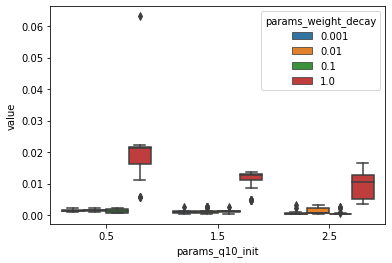

In [13]:
sb.boxplot(x='params_q10_init', y='value', hue='params_weight_decay', data=df)

In [25]:
ds = xr.open_dataset('../logs/experiment_01/n_ta/lightning_logs/version_0/predictions.nc')

In [26]:
epoch = 0

In [27]:
ds.isel(epoch=slice(0, epoch + 1))

<xarray.Dataset>
Dimensions:    (epoch: 1, iter: 1015, time: 17520)
Coordinates:
  * time       (time) datetime64[ns] 2007-01-01T00:15:00 ... 2007-12-31T23:45:00
  * epoch      (epoch) int64 0
  * iter       (iter) int64 0 1 2 3 4 5 6 ... 1008 1009 1010 1011 1012 1013 1014
Data variables:
    reco       (time) float64 ...
    rb         (time) float64 ...
    reco_pred  (epoch, time) float64 ...
    rb_pred    (epoch, time) float64 ...
    q10        (iter) float32 ...
Attributes:
    created:  2021-04-26 13:52:05
    author:   bkraft@bgc-jena.mpg.de

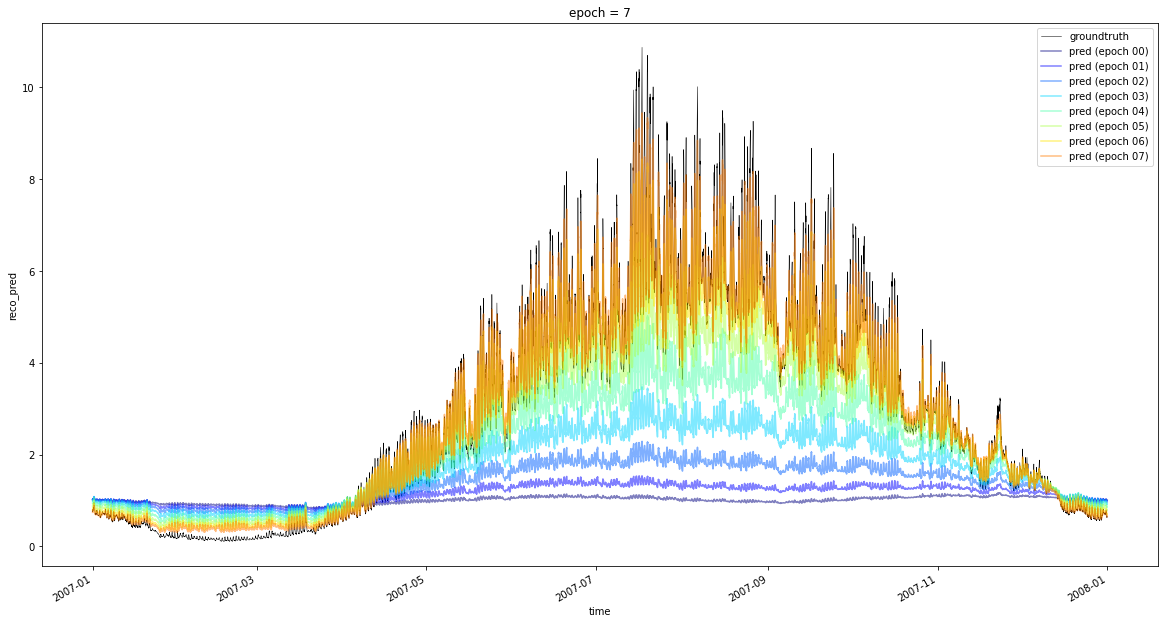

In [28]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()

ax.set_prop_cycle(cycler(color=cmap.jet(np.linspace(0, 1, 10))))


ds['reco'].plot(color='k', lw=0.5, label='groundtruth')
for i in range(8):
    ds['reco_pred'].isel(epoch=i).plot(alpha=0.5, ax=ax, label=f'pred (epoch {i:02d})')

plt.legend()